# The Problem:

We will be analyzing the technology stocks, Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN). We want the risk of a stock based on its previous performance history, and predicting future stock prices through simulation, using the Monte Carlo method.

We will answer the following questions.

1.) What was the change in price of the stock over time?  
2.) What was the moving average of the various stocks?  
3.) What was the daily return of the stock on average?  
4.) What was the correlation between different stocks' daily returns?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior?

In [57]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [59]:
from datetime import datetime

In [60]:
from __future__ import division

In [61]:
temp_AAPL = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aapl.us.txt')
temp_GOOG = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/goog.us.txt')
temp_MSFT = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/msft.us.txt')
temp_AMZN = pd.read_csv('./price-volume-data-for-all-us-stocks-etfs/Data/Stocks/amzn.us.txt')


In [62]:
AAPL = temp_AAPL[(temp_AAPL['Date']>'2017-00-00')]
GOOG = temp_GOOG[(temp_GOOG['Date']>'2017-00-00')]
MSFT = temp_MSFT[(temp_MSFT['Date']>'2017-00-00')]
AMZN = temp_AMZN[(temp_AMZN['Date']>'2017-00-00')]

In [63]:
AAPL.reset_index(drop=True, inplace=True)
AAPL.set_index('Date', inplace=True)

GOOG.reset_index(drop=True, inplace=True)
GOOG.set_index('Date', inplace=True)

MSFT.reset_index(drop=True, inplace=True)
MSFT.set_index('Date', inplace=True)

AMZN.reset_index(drop=True, inplace=True)
AMZN.set_index('Date', inplace=True)

Let's play around with the AAPL DataFrame to get a feel for the data.

In [64]:
AAPL.describe()

,Open,High,Low,Close,Volume,OpenInt
count,218.000000,218.000000,218.000000,218.000000,2.180000e+02,218.0
mean,145.998440,146.932706,145.061972,146.111101,2.700632e+07,0.0
std,13.412919,13.492815,13.095781,13.273582,1.175763e+07,0.0
min,113.970000,114.490000,112.930000,114.190000,1.422849e+07,0.0
25%,139.302500,139.955000,138.472500,139.107500,2.012100e+07,0.0
50%,146.625000,147.800000,145.110000,147.430000,2.409021e+07,0.0
75%,155.775000,156.670000,154.535000,155.400000,3.006879e+07,0.0
max,175.110000,175.610000,174.270000,175.610000,1.120360e+08,0.0


In [65]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, 2017-01-03 to 2017-11-10
Data columns (total 6 columns):
Open       218 non-null float64
High       218 non-null float64
Low        218 non-null float64
Close      218 non-null float64
Volume     218 non-null int64
OpenInt    218 non-null int64
dtypes: float64(4), int64(2)
memory usage: 11.9+ KB


# 1.) What was the change in price of the stock over time?

Let's plot the volume and closing price of the stocks for Apple.

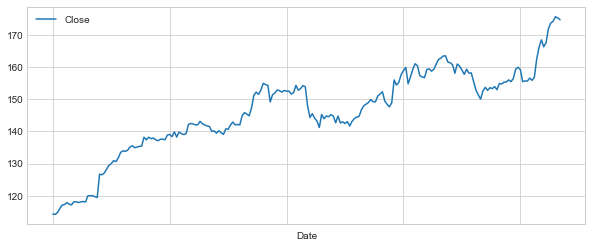

In [66]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

Let's plot the total volume of stock being traded each day over the past 5 years.

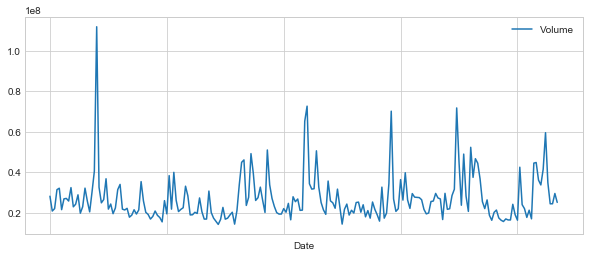

In [67]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

# 2.) What was the moving average of the various stocks?

Let's calculate the moving average for the stock. This means taking subsets of the data and using the means of those intervals instead of every single point of data.

In [68]:
# Taking the moving average, taking subsets of the data and using the means of those intervals instead of every single point of data.
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

C:\Users\jeson\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


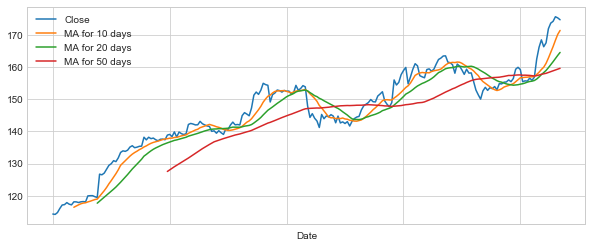

In [69]:
AAPL[['Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))


Notice that as we take the moving averages for longer windows, we get smoother lines. It's not as reliant on the daily fluctuations for its general trend. Moving average shouldn't be relied for a 100% accurate representation of future behaviour. Simplifies data and makes it easier to isolate trends. 



We're now going to analyze the risk of the stock. We need to take a look at the daily changes of the stock and not just its absolute value.

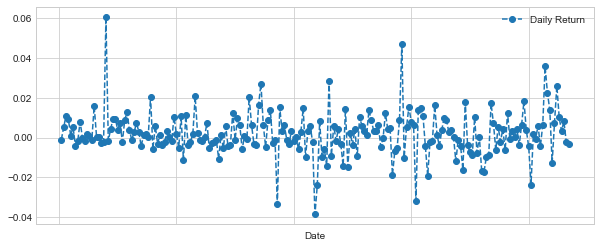

In [70]:
# Daily returns and risks of stocks. Taking a look at daily changes of stocks, not just aboslute values.
AAPL.loc[:, 'Daily Return'] = AAPL['Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')
# Daily returns. This tells us the percent return of our money on any given day. If we bought stock in the beginning of the day, did we gain money (+%), or lose money (-%)?  

# 3.) What was the daily return of the stock on average?

Now let's get an overall look at the average daily return using a histogram. Let's visualize this nicely using both a histogram and a KDE plot on the same figure.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


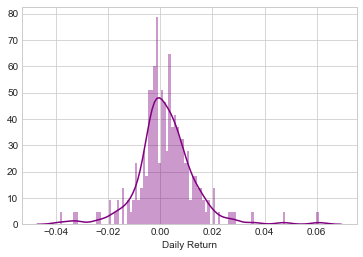

In [71]:
# Average daily return using histograms.
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple') # Let's use layer 2 plots. A KDE plot and a histogram.
# Histogram of daily returns. Skewed a bit on the positive side.

Now let's analyze the returns of all the stocks in our list. Let's build a nice DataFrame with all the 'Close' columns for each of the stock DataFrames.

In [72]:
tech_list = [AAPL, GOOG, MSFT, AMZN]
AAPL.name = 'AAPL'
GOOG.name = 'GOOG'
MSFT.name = 'MSFT'
AMZN.name = 'AMZN'

closing_df = pd.DataFrame(columns=['AAPL', 'GOOG', 'MSFT', 'AMZN'], index=list(AAPL.index.values))

In [73]:
for df in tech_list:
    closing_df[df.name] = df['Close'] 

In [74]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
2017-01-03,114.31,786.14,61.520,753.67
2017-01-04,114.19,786.90,61.246,757.18
2017-01-05,114.77,794.03,61.246,780.45
2017-01-06,116.04,806.15,61.776,795.99
2017-01-09,117.11,806.65,61.580,796.92


Using these closing prices, we can now calculate the daily return for all the stocks.

In [75]:
tech_rets = closing_df.pct_change()

In [76]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001050,0.000967,-0.004454,0.004657
2017-01-05,0.005079,0.009061,0.000000,0.030732
2017-01-06,0.011066,0.015264,0.008654,0.019912
2017-01-09,0.009221,0.000620,-0.003173,0.001168


Let's compare the daily percentage return of two stocks to find correlations. For comparison, let's see a stock compared to itself. It will have a 1 to 1 correlation obviously.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


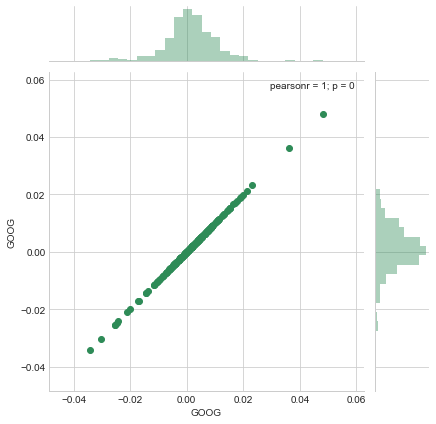

In [77]:
# Comparing daily return percentages, we can see correlations between stocks.
# Comparing Google to itself. We expect a correlation of 1.
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen') # Joint plots join 2 plots. Histogram and anything else. In this case we use scatter.
# Pearson R is the correlation variable name.

As we expect, if two stocks are positively correlated with each other, a linear relationship between its daily return values should occur. Let's compare Google and Microsoft.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


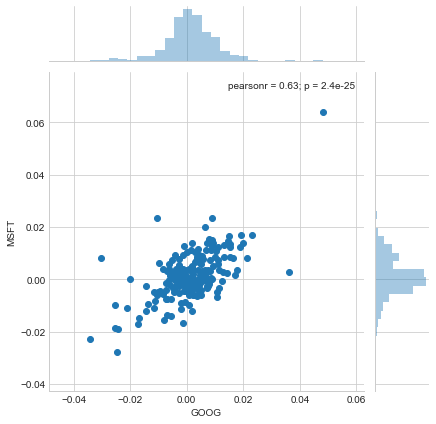

In [78]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')
# Pearson Product-Moment Correlation Coefficient = 0.63. Fairly correlated.

There is a positive correlation between the two stocks from both the graph and the Pearson correlation coefficient of 0.63. We can see this intuitively using the image below.

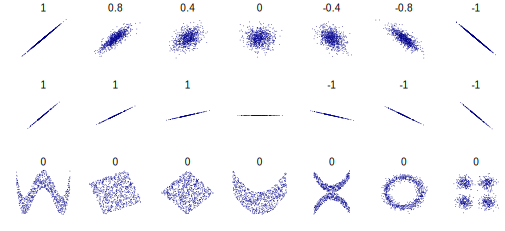

In [79]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Using Seaborn and pandas, we can easily repeat this comparison analysis for every possible combination of stocks.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)
C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


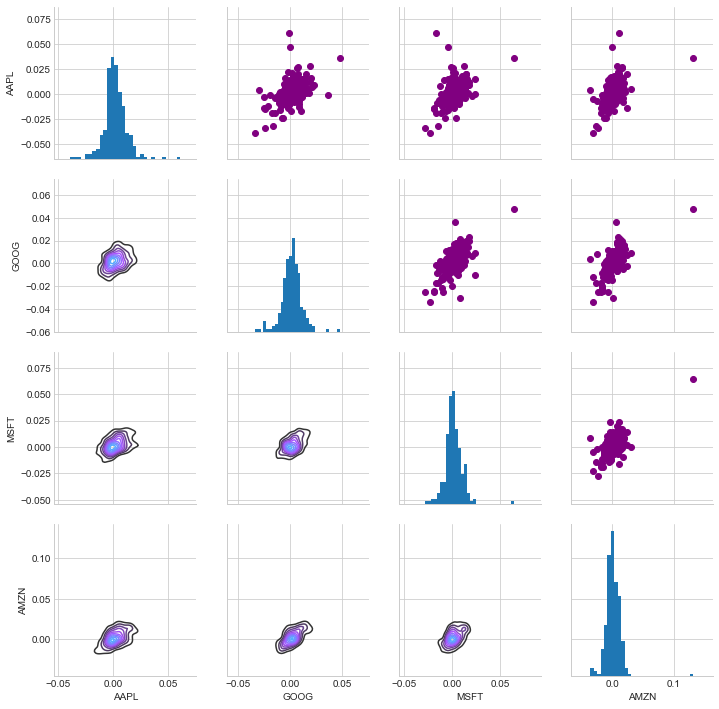

In [80]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

A quick glance at the above figure shows a  linear correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comparison.

We can also do a correlation plot, to get actual numerical vlues for the correlation between the stocks' daily return values.

# 4.) What was the correlation between different stocks' daily returns? 

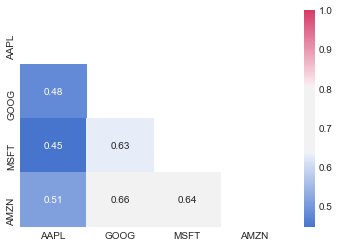

In [81]:
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n=7, as_cmap=True), annot=True, mask=mask)

As we suspected in our PairPlot, we see here numerically and visually that Google and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

# 5.) How much value do we put at risk by investing in a particular stock?

In [82]:
# Risk is the standard deviation of the daily returns.
rets = tech_rets.dropna()

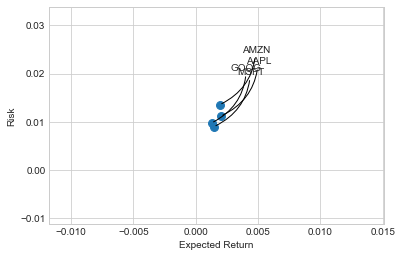

In [83]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, xy = (x, y), xytext = (50, 50), textcoords = 'offset points',
        ha = 'right', va = 'bottom', arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))
    
# We would typically like a stock to have a high expected return and a low risk. In this case, AAPL might be the best choice.
# We don't want a negative expected return with high risk, because that would mean that the stock has a high standard deviation.
# The game of the stock market occurs when a stock has a high expected return, but also a high risk.

C:\Users\jeson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


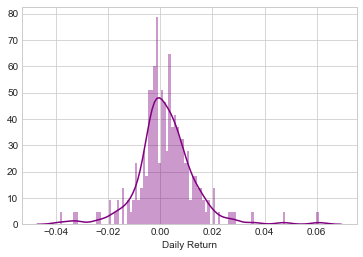

In [84]:
# Value at risk
# We can treat value at risk as the amount of money we could expect to lose 
# (aka putting at risk) for a given confidence interval. There are several 
# methods we can use for estimating a value at risk.

# Bootstrap method to calculate the empirical quantiles from a histogram of daily returns.

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [85]:
rets['AAPL'].quantile(0.05)
# This means that the 0.05 empirical quantile. With 95% confidence, the worst daily loss would not exceed 1.4%.
# This is the value at risk.
# 95% of simulations, your worst daily loss would not exceed 1.4%.

-0.014385203951598702

We can use quantile to get the risk value for the stock.

The 0.05 empirical quantile of daily returns is at -0.014. That means that with 95% confidence, our worst daily loss will not exceed 1.4%. If we have a 1 million dollar investment, our one-day 5% Value at Risk is 0.014 * 1,000,000 = $14,000.

# 6.) How can we attempt to predict future stock behavior?

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements. 

Past information of a price is independent of the future price. Future behaviour can't be predicted solely on past behaviour.

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. We'll use the Google (GOOG) stock.

In [86]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [87]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days) # Array of zero's with length of days
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price
    

In [88]:
GOOG.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2017-01-03,778.81,789.630,775.800,786.14,1605446,0
2017-01-04,788.36,791.340,783.160,786.90,1052125,0
2017-01-05,786.08,794.480,785.020,794.03,1114512,0
2017-01-06,795.26,807.900,792.204,806.15,1567821,0
2017-01-09,806.40,809.966,802.830,806.65,1230371,0


As we can see from the table above, start_price for the Google stock is 778.81.

Text(0.5,1,'Monte Carlo Analysis for Google')

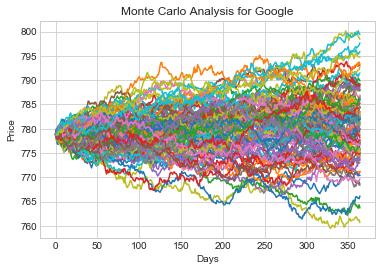

In [89]:
start_price = 778.81

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Now we'll run a simulation for much longer (10,000 simulations), and only plot a histogram of the ending prices for each simulation, instead of the trend for each simulation like above.

In [90]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1] # Getting the final price of the simulation

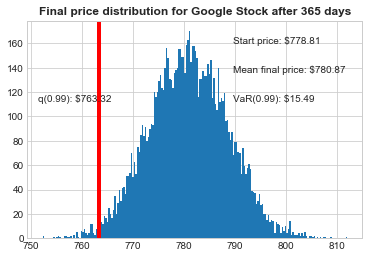

In [91]:
q = np.percentile(simulations, 1)  # 99% of the values should fit in the output

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

# Histogram of all the final prices. This shows that the stock is fairly stable.
# As we saw in Risk vs. Expected Returns plot, the expected returns was close to 0.
# 99% of the time, the amount of money you would lose at most is the VaR, $15.61.

Now we've looked at the 1% empirical quantile of the final price distribution to estimate the VaR for the Google stock, which is \$15.49 for every investment of \$778.81 (the price of one initial Google stock).

This means for every initial stock you purchase, you're putting \$15.49 at risk 99% of the time.